In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Define the data
data = {
    'Model': [
        'Linear Regression', 'Linear Regression', 'Linear Regression',
        'Moving Average', 'Moving Average', 'Moving Average',
        'Holt’s Method', 'Holt’s Method', 'Holt’s Method'
    ],
    'Category': ['Runners', 'Repeaters', 'Strangers'] * 3,
    'MAD': [11.6238, 0.4645, 63.4459, 146.2094, 0.4643, 47.2362, 15.6789, 0.3632, 12.9719],
    'MSE': [1456.294, 0.4767, 422910.40, 213453.84, 0.4586, 142155.09, 3940.0424, 0.4182, 29909.313],
    'MAPE': [11.87, 11.52, 303.12, 42.86, 11.44, 278.28, 8.59, 8.99, 64.75]
}

# Create a DataFrame
df = pd.DataFrame(data)
df

,Model,Category,MAD,MSE,MAPE
0,Linear Regression,Runners,11.6238,1456.2940,11.87
1,Linear Regression,Repeaters,0.4645,0.4767,11.52
2,Linear Regression,Strangers,63.4459,422910.4000,303.12
3,Moving Average,Runners,146.2094,213453.8400,42.86
4,Moving Average,Repeaters,0.4643,0.4586,11.44
5,Moving Average,Strangers,47.2362,142155.0900,278.28
6,Holt’s Method,Runners,15.6789,3940.0424,8.59
7,Holt’s Method,Repeaters,0.3632,0.4182,8.99
8,Holt’s Method,Strangers,12.9719,29909.3130,64.75


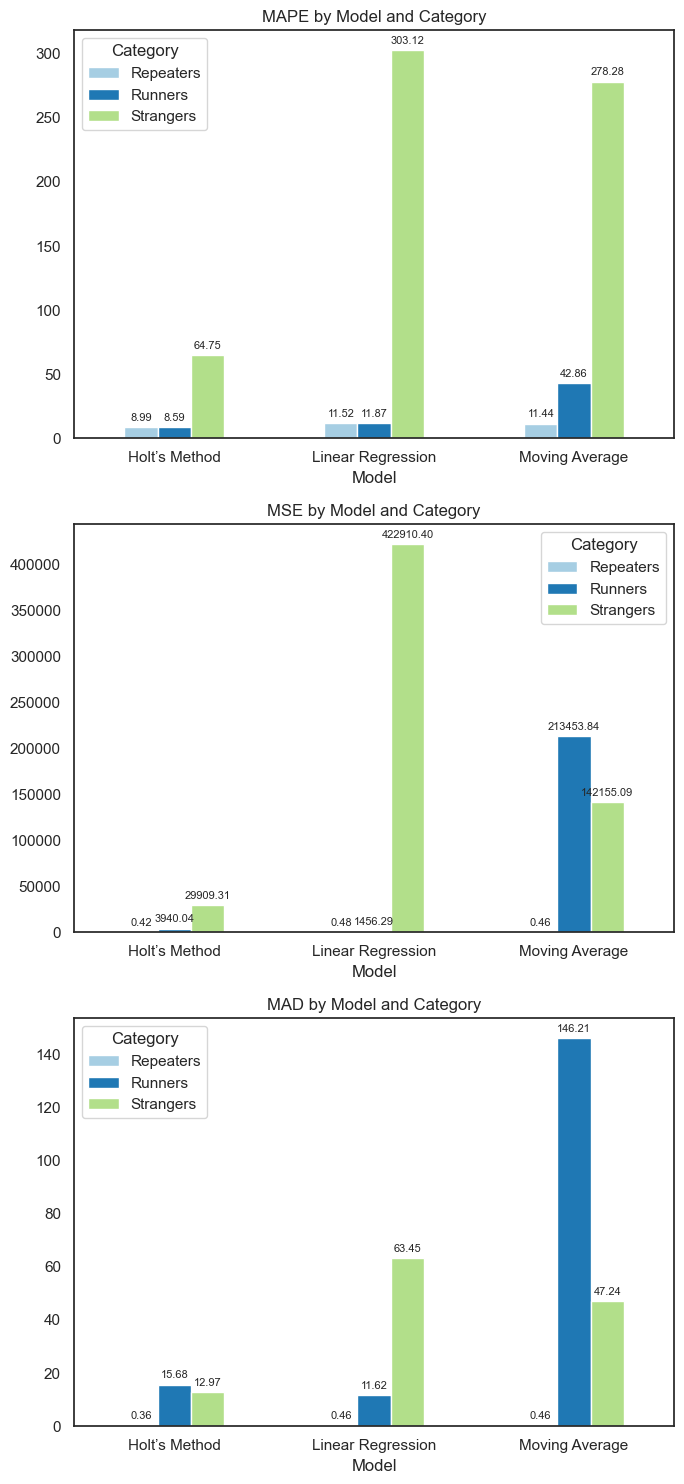

In [82]:
# Create separate graphs for MAPE, MSE, and MAD
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 15), tight_layout=True)

# Define a color palette
palette = sns.color_palette("Paired")
sns.set_theme(style="white")

# Define the bar width to make categories closer
bar_width = 0.25

# Iterate over each error metric
for i, metric in enumerate(['MAPE', 'MSE', 'MAD']):
    # Pivot the DataFrame for the current metric
    pivot_df = df.pivot(index='Model', columns='Category', values=metric)
    
    # Create the bar chart with the defined color palette
    pivot_df.plot(kind='bar', ax=axes[i], title=f'{metric} by Model and Category', color=palette)
    
    # Annotate the actual values on the bars
    # Annotate the actual values on the bars
    for bar in axes[i].patches:
        # Using the bar's position and width to calculate where to put the annotation
        bar_x_center = bar.get_x() + bar.get_width() / 2
        bar_y_value = bar.get_height()
        axes[i].annotate(f'{bar_y_value:.2f}', 
                         (bar_x_center, bar_y_value), 
                         ha='center', va='bottom',
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords='offset points',
                         fontsize=8, rotation=360)  # Rotate text for better visibility and smaller font size
        
    # Rotate x-axis labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=360)
